In [87]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [88]:
print(f'x_train.shape: {x_train.shape}')
print(f'x_test.shape: {x_test.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'y_test.shape: {y_test.shape}')

x_train.shape: (60000, 28, 28)
x_test.shape: (10000, 28, 28)
y_train.shape: (60000,)
y_test.shape: (10000,)


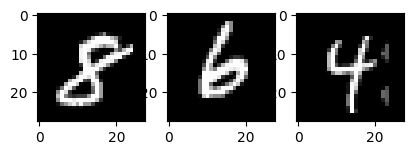

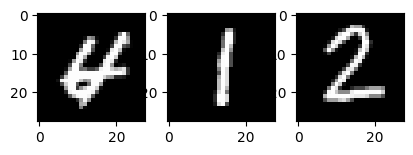

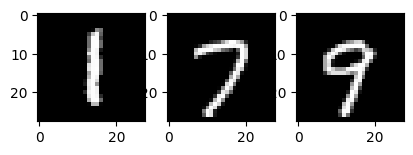

In [89]:
import matplotlib.pyplot as plt
import random

for i in range(1, 4, 1):
    for j in range(1, 4, 1):
        plt.subplot(i, 4, j)
        plt.imshow(x_train[random.randint(0, 60000)], cmap="gray")
    plt.show()

In [90]:
x_train_vec = x_train.reshape((60000, 28, 28, 1))
x_test_vec = x_test.reshape((10000, 28, 28, 1))

print(f'x_train.shape: {x_train.shape}')
print(f'x_test.shape: {x_test.shape}')

print(f'x_train_vec.shape: {x_train_vec.shape}')
print(f'x_test_vec.shape: {x_test_vec.shape}')

x_train.shape: (60000, 28, 28)
x_test.shape: (10000, 28, 28)
x_train_vec.shape: (60000, 28, 28, 1)
x_test_vec.shape: (10000, 28, 28, 1)


In [91]:
import numpy as np

def to_one_hot(labels, dimension=10):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

y_train_vec = to_one_hot(y_train)
y_test_vec = to_one_hot(y_test)

print(f"y_train_vec.shape:{y_train_vec.shape}")

y_train_vec.shape:(60000, 10)


In [92]:
print

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [93]:
for x in x_train[50000]:
    for i in x:
        print('{:3}'.format(i), end='')
    print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 47160195205 71 86 13  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 12238254254254254254227 84  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 13196176127176207236245222 23  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 20137254 95  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 78254144  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 17200254170  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 47218254216 29  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 95225254245 65  0  0  0  

In [94]:

rand_indices = np.random.permutation(60000)
train_indices = rand_indices[0:50000]
valid_indices = rand_indices[50000:60000]

x_valid_vec = x_train_vec[valid_indices, :, :, :]
y_valid_vec = y_train_vec[valid_indices, :]

x_train_vec = x_train_vec[train_indices, :, :, :]
y_train_vec = y_train_vec[train_indices, :] 

In [95]:
x_train_vec.shape

(50000, 28, 28, 1)

In [96]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(filters=10, kernel_size=(5, 5), activation='relu', 
                 input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=20, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)              │ (None, 24, 24, 10)     │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 12, 12, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 8, 8, 20)       │         5,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 4, 4, 20)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 320)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 100)            │        32,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,390 (149.96 KB)

 Trainable params: 38,390 (149.96 KB)

 Non-trainable params: 0 (0.00 B)

In [97]:

from keras.optimizers import RMSprop

model.compile(
    optimizer=RMSprop(learning_rate=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy'])

In [99]:
history = model.fit(x_train_vec, y_train_vec,
          batch_size = 128, 
          epochs = 50, 
          validation_data=(x_valid_vec,
                           y_valid_vec)
                   )


# history = model.fit(x_train_vec, y_train_vec,
#           batch_size=128,
#           epochs=100,
#           validation_data=(x_valid_vec, 
#                            y_valid_vec)
#          )



Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5152 - loss: 15.2079 - val_accuracy: 0.8674 - val_loss: 1.1103
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8852 - loss: 0.9001 - val_accuracy: 0.9093 - val_loss: 0.6289
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9248 - loss: 0.5013 - val_accuracy: 0.9320 - val_loss: 0.4345
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9405 - loss: 0.3438 - val_accuracy: 0.9445 - val_loss: 0.3331
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9530 - loss: 0.2441 - val_accuracy: 0.9461 - val_loss: 0.3180
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9597 - loss: 0.1990 - val_accuracy: 0.9512 - val_loss: 0.2676
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9635 - loss: 0.1623 - val_accuracy: 0.9584 - val_loss: 0.2275
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9696 - loss: 0.1363 - val_accuracy: 0

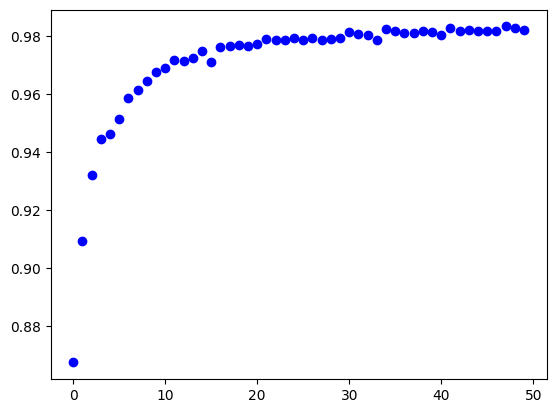

In [100]:
import matplotlib.pyplot as plt
import numpy as np

epoch = np.arange(len(history.history['accuracy']))
train_acc = history.history['accuracy']
train_acc = history.history['val_accuracy']

plt.plot(epoch, train_acc, 'bo', label='train acc')
plt.show()

In [101]:
r = model.evaluate(x_test_vec, y_test_vec)

print('Loss =', str(r[0]))
print('Accuracy =', str(r[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9798 - loss: 0.1284
Loss = 0.10885169357061386
Accuracy = 0.9828000068664551


In [103]:
model.save('mnist984.h5')